# Histogram With Graph Objects

# List Data

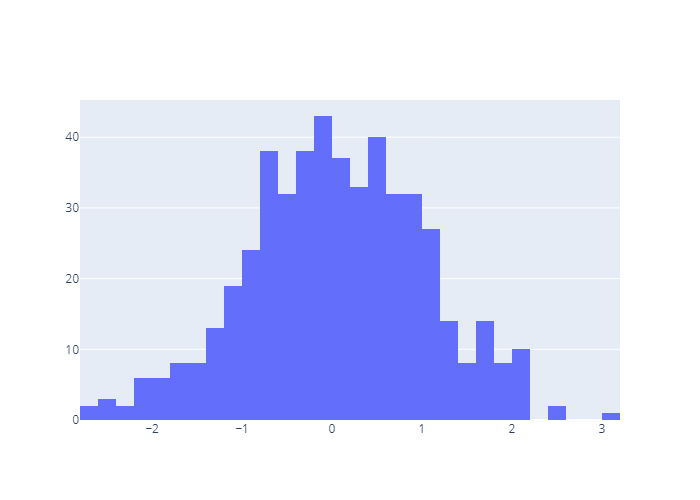

In [2]:
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

go.Figure(data=[go.Histogram(x=np.random.randn(500))])

## Probability

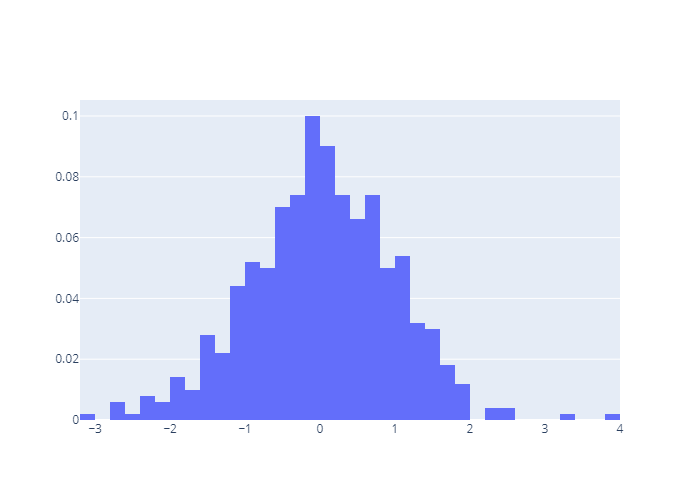

In [3]:
import plotly.graph_objects as go

import numpy as np

go.Figure(data=[go.Histogram(x=np.random.randn(500), histnorm='probability')])

## Horizontal

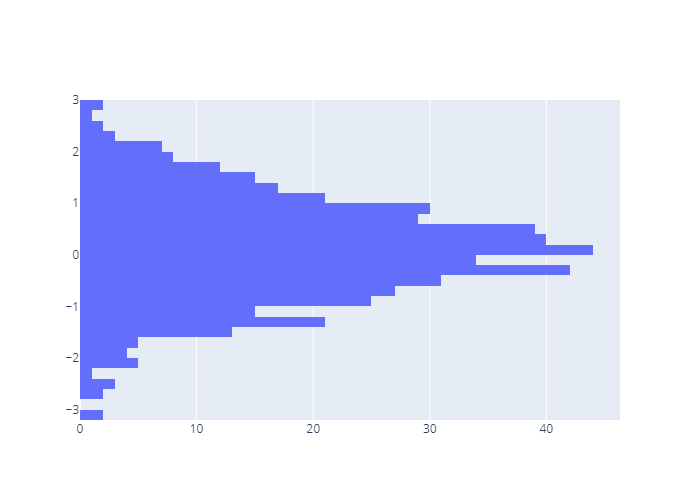

In [4]:
import plotly.graph_objects as go

import numpy as np

# Use `y` argument instead of `x` for horizontal histogram
go.Figure(data=[go.Histogram(y=np.random.randn(500))])

## Overlaid histograms

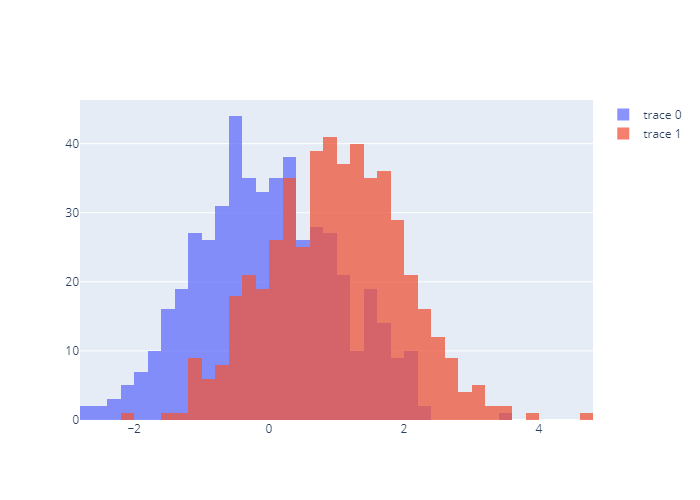

In [5]:
import plotly.graph_objects as go

import numpy as np

x0 = np.random.randn(500)
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig

## Stacked Histograms

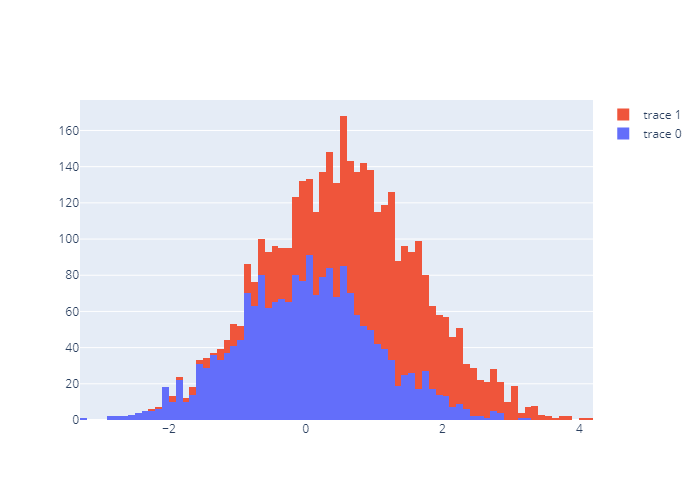

In [6]:
import plotly.graph_objects as go

import numpy as np

x0 = np.random.randn(2000)
x1 = np.random.randn(2000) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# The two histograms are drawn on top of another
fig.update_layout(barmode='stack')
fig

## Styled Histogram

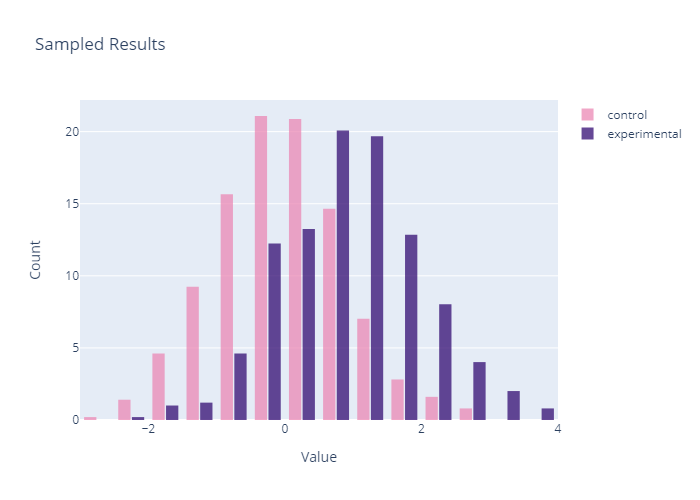

In [7]:
import plotly.graph_objects as go

import numpy as np
x0 = np.random.randn(500)
x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(
    x=x0,
    histnorm='percent',
    name='control', # name used in legend and hover labels
    xbins=dict( # bins used for histogram
        start=-4.0,
        end=3.0,
        size=0.5
    ),
    marker_color='#EB89B5',
    opacity=0.75
))
fig.add_trace(go.Histogram(
    x=x1,
    histnorm='percent',
    name='experimental',
    xbins=dict(
        start=-3.0,
        end=4,
        size=0.5
    ),
    marker_color='#330C73',
    opacity=0.75
))

fig.update_layout(
    title_text='Sampled Results', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
)

fig

## Display bar values

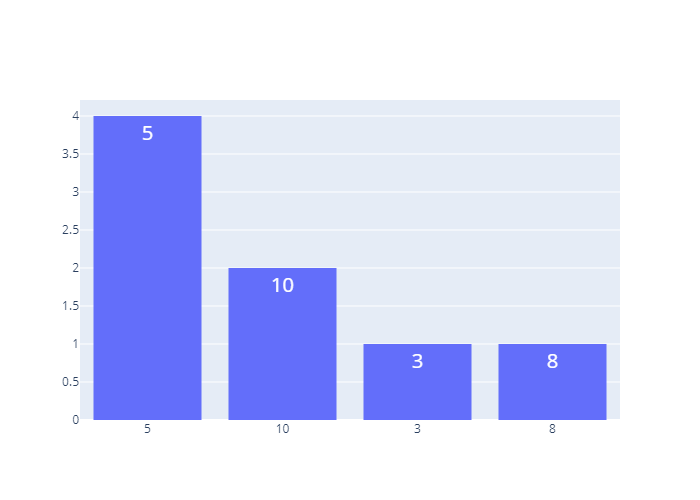

In [8]:
import plotly.graph_objects as go

numbers = ["5", "10", "3", "10", "5", "8", "5", "5"]

fig = go.Figure()
fig.add_trace(go.Histogram(x=numbers, name="count", texttemplate="%{x}", textfont_size=20))

fig

## Cumulative Histogram

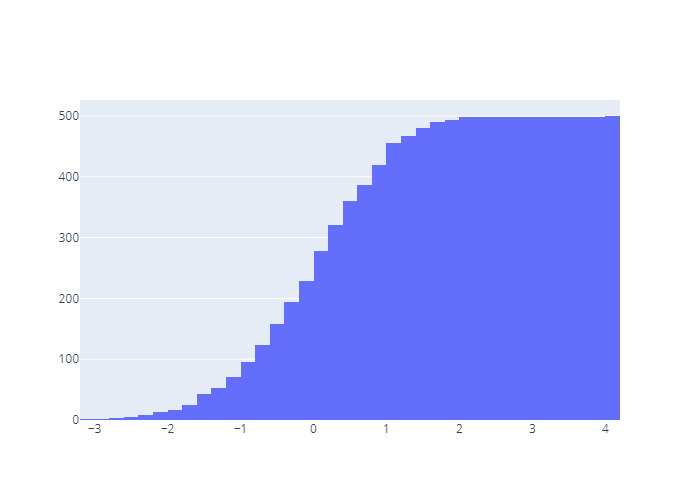

In [9]:
import plotly.graph_objects as go
import numpy as np

go.Figure(data=[go.Histogram(x=np.random.randn(500), cumulative_enabled=True)])

## Specify Aggregation Function

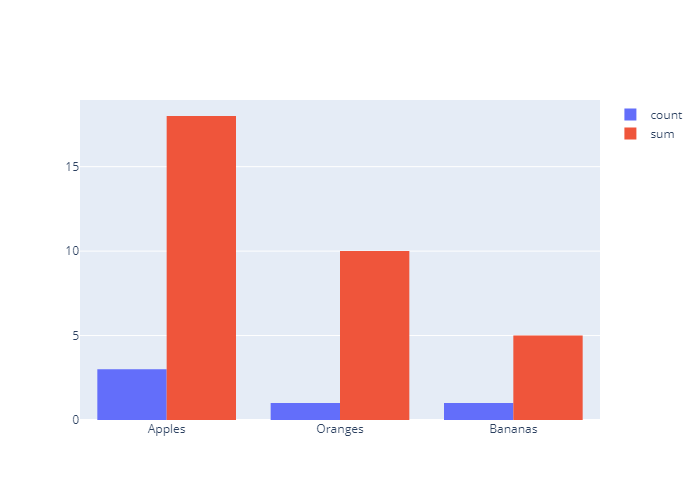

In [10]:
import plotly.graph_objects as go

x = ["Apples","Apples","Apples","Oranges", "Bananas"]
y = ["5","10","3","10","5"]

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=y, x=x, name="count"))
fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="sum"))

fig

## Custom Binning

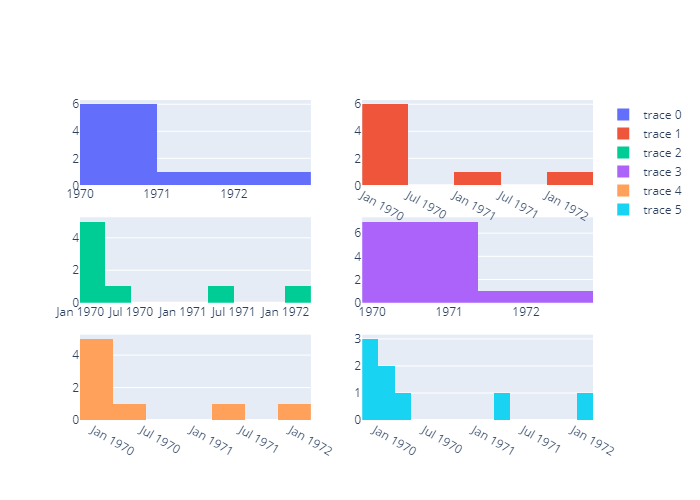

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

x = ['1970-01-01', '1970-01-01', '1970-02-01', '1970-04-01', '1970-01-02',
     '1972-01-31', '1970-02-13', '1971-04-19']

fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=x, nbinsx=4)
trace1 = go.Histogram(x=x, nbinsx = 8)
trace2 = go.Histogram(x=x, nbinsx=10)
trace3 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M18'), # M18 stands for 18 months
                      autobinx=False
                     )
trace4 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M4'), # 4 months bin size
                      autobinx=False
                      )
trace5 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size= 'M2'), # 2 months
                      autobinx = False
                      )

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig

## Share bins between histograms

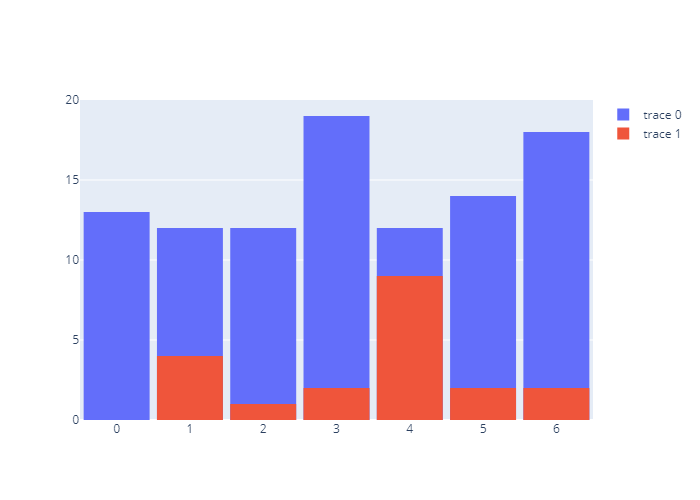

In [12]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(go.Histogram(
    x=np.random.randint(7, size=100),
    bingroup=1))

fig.add_trace(go.Histogram(
    x=np.random.randint(7, size=20),
    bingroup=1))

fig.update_layout(
    barmode="overlay",
    bargap=0.1)

fig

## Summarizing Time-series Data with Histograms

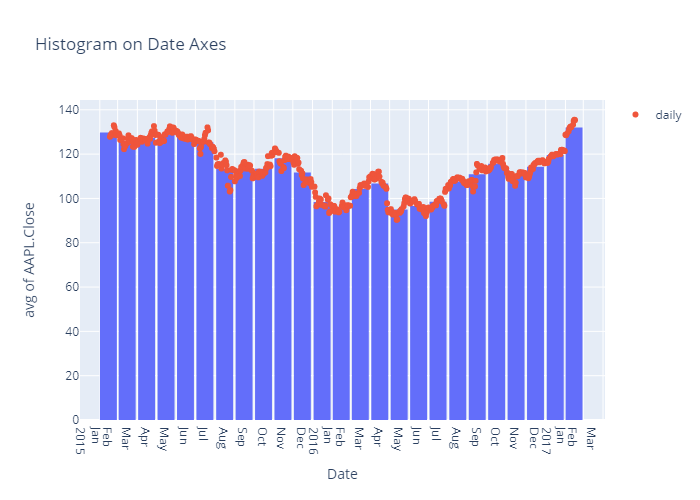

In [13]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv')

fig = px.histogram(df, x="Date", y="AAPL.Close", histfunc="avg", title="Histogram on Date Axes")
fig.update_traces(xbins_size="M1")
fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(mode="markers", x=df["Date"], y=df["AAPL.Close"], name="daily"))
fig.show()